## Construction of the Frailty Index
#### April 28th by Gavin Qu
First we do the data cleaning by concatenating dataframes using pandas 

In [2]:
import pandas as pd
import numpy as np
import pyreadstat

In [3]:
# use latin-1 encoding if UTF8 does not work
wave1, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/a_indresp.dta")
wave2, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/b_indresp.dta")
wave3, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/c_indresp.dta", encoding="iso-8859-1")
wave4, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/d_indresp.dta")
wave5, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/e_indresp.dta", encoding="iso-8859-1")
wave6, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/f_indresp.dta")
wave7, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/g_indresp.dta")
wave8, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/h_indresp.dta")
wave9, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/i_indresp.dta")
wave10, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/j_indresp.dta")
wave11, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/k_indresp.dta")
wave12, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/l_indresp.dta")
wave13, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/m_indresp.dta")

Read the death data in the xhhrel.dta, the variable for it is 'dcsedfl_dv'

In [4]:
death_df, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/xhhrel.dta")

#### Define Columns to extract

In [92]:
# List of base columns (personal ID)
base_columns = ['pidp']

# Age columns for 13 waves stored as a list
age_columns = [f'{chr(97 + i)}_age_dv' for i in range(13)]

# "Difficulty doing something" columns for 13 waves, from 'disdif1' to 'disdif12'
difficulty_columns = [f'{chr(97 + i)}_disdif{j}' for i in range(13) for j in range(1, 13)]

# Combine all columns to extract
columns_to_extract = base_columns + age_columns + difficulty_columns

#### Extract data and include waves

In [94]:
# Corrected function to extract specified columns and add wave identifier
def extract_wave_data(wave, wave_letter, columns_to_extract):
    # Check if the required columns are present in the given wave
    missing_columns = [col for col in columns_to_extract if col not in wave.columns]
    if missing_columns:
        raise ValueError(f"Missing columns in wave '{wave_letter}': {missing_columns}")

    # Extract the specified columns and add the wave identifier
    df = wave[columns_to_extract]
    df['wave'] = wave_letter  # Add the wave identifier
    return df

Re extract with the correct values and validate

In [ ]:
# Define the list of wave letters from 'a' to 'm'
wave_letters = [chr(97 + i) for i in range(13)]

# Extract data for each wave with the corrected function
waves_extracted = []
for i, wave in enumerate([wave1, wave2, wave3, wave4, wave5, wave6, wave7, wave8, wave9, wave10, wave11, wave12, wave13]):
    wave_letter = wave_letters[i]
    extracted_wave = extract_wave_data(wave, wave_letter, columns_to_extract)  # Corrected function call
    waves_extracted.append(extracted_wave)

In [86]:
import pandas as pd

# Re-set indices to ensure consistent concatenation
for wave in waves_extracted:
    wave.reset_index(drop=True, inplace=True)

# Concatenate the dataframes
df_combined = pd.concat(waves_extracted, ignore_index=True)

# Verify the concatenated dataframe for column consistency
print("Columns in the combined dataframe:\n", df_combined.columns)

# Check the first few rows to ensure proper concatenation
print("Preview of the combined dataframe:\n", df_combined.head())

Columns in the combined dataframe:
 Index(['a_age_dv', 'pidp', 'a_disdif1', 'a_disdif2', 'a_disdif3', 'a_disdif4',
       'a_disdif5', 'a_disdif6', 'a_disdif7', 'a_disdif8',
       ...
       'm_disdif3', 'm_disdif4', 'm_disdif5', 'm_disdif6', 'm_disdif7',
       'm_disdif8', 'm_disdif9', 'm_disdif10', 'm_disdif11', 'm_disdif12'],
      dtype='object', length=171)
Preview of the combined dataframe:
    a_age_dv      pidp  a_disdif1  a_disdif2  a_disdif3  a_disdif4  a_disdif5  \
0      39.0  68001367       -8.0       -8.0       -8.0       -8.0       -8.0   
1      59.0  68004087       -8.0       -8.0       -8.0       -8.0       -8.0   
2      39.0  68006127        0.0        0.0        0.0        1.0        0.0   
3      17.0  68006135       -8.0       -8.0       -8.0       -8.0       -8.0   
4      72.0  68006807        1.0        1.0        0.0        0.0        1.0   

   a_disdif6  a_disdif7  a_disdif8  ...  m_disdif3  m_disdif4  m_disdif5  \
0       -8.0       -8.0       -8.0  ... 

In [87]:
# Check the unique 'pidp' across waves to ensure consistency
unique_pidps_per_wave = {chr(97 + i): wave['pidp'].nunique() for i, wave in enumerate(waves_extracted)}
print("Unique 'pidp' per wave:\n", unique_pidps_per_wave)

# If there's a significant mismatch, there might be a misalignment in the data


Unique 'pidp' per wave:
 {'a': 50994, 'b': 54569, 'c': 49692, 'd': 47074, 'e': 44837, 'f': 45192, 'g': 42170, 'h': 39294, 'i': 36058, 'j': 34319, 'k': 32008, 'l': 29271, 'm': 27998}


#### Count missing values

In [85]:
# Check for missing values in the combined dataframe
missing_values = df_combined.isna().sum()
print("Missing values in the combined dataframe:\n", missing_values)

# Ensure unique 'pidp' values are consistent across the combined dataframe
unique_pidps = df_combined['pidp'].nunique()
print("Total unique 'pidp' in the combined dataframe:", unique_pidps)

Missing values in the combined dataframe:
 a_age_dv      482482
pidp               0
a_disdif1     482482
a_disdif2     482482
a_disdif3     482482
               ...  
m_disdif8     505478
m_disdif9     505478
m_disdif10    505478
m_disdif11    505478
m_disdif12    505478
Length: 171, dtype: int64
Total unique 'pidp' in the combined dataframe: 89348


#### Generate summary of the data

In [75]:
# Display basic statistics for numerical columns
summary_statistics = df_combined.describe()

# Display the summary
print("Summary Statistics:\n", summary_statistics)

# General information about the dataframe
df_info = df_combined.info()

# Display general information (includes data types and non-null counts)
print("DataFrame Information:\n", df_info)


Summary Statistics:
            a_age_dv          pidp     a_disdif1     a_disdif2     a_disdif3  \
count  50994.000000  5.334760e+05  50994.000000  50994.000000  50994.000000   
mean      45.638781  7.791696e+08     -5.166490     -5.142880     -5.235557   
std       18.189291  4.651655e+08      3.909239      3.943244      3.807181   
min       15.000000  2.244500e+04     -8.000000     -8.000000     -8.000000   
25%       31.000000  4.080871e+08     -8.000000     -8.000000     -8.000000   
50%       44.000000  7.483971e+08     -8.000000     -8.000000     -8.000000   
75%       59.000000  1.157270e+09      0.000000      0.000000      0.000000   
max      101.000000  1.653277e+09      1.000000      1.000000      1.000000   

          a_disdif4     a_disdif5    a_disdif6     a_disdif7     a_disdif8  \
count  50994.000000  50994.000000  50994.00000  50994.000000  50994.000000   
mean      -5.255638     -5.256187     -5.25954     -5.276307     -5.238303   
std        3.776754      3.775917

#### Look at the data frame for deceased info

In [76]:
print(death_df.head())

   osm_hh       pidp  sex  doby_dv  osm_hh_size  osm_hh_head  hhorig  sampst  \
0     687        687    2      -20            1            1       3       1   
1    1367       1367    1      -20            2            1       3       1   
2    1367       2051    1      -20            2            0       3       1   
3    2727       2727    2      -20            4            1       3       1   
4    2727  752052125    2     1966            4            0       3       1   

   dcsedfl_dv  dcsedw_dv  ...  apx_rr_ef  spx_rr_ef  fpx_rr_ef  lpx_rr_ef  \
0           3         -8  ...         -8         -8         -8         -8   
1           3         -8  ...         -8         -8         -8         -8   
2           3         -8  ...         -8         -8         -8         -8   
3           3         -8  ...         -8         -8         -8         -8   
4           3         -8  ...         -8         -8         -8         -8   

   gpx_rr_ef  bsbx_rr_ef  hsbx_rr_ef  lsbx_rr_ef  aux_rr

#### Merge the death data frame

In [77]:
import pandas as pd

# Merge the combined dataframe with death_df based on 'pidp'
df_with_death = pd.merge(df_combined, death_df[['pidp', 'dcsedfl_dv']], on='pidp', how='left')

# Preview the first few rows after the merge
print(df_with_death.head())

   a_age_dv      pidp  a_disdif1  a_disdif2  a_disdif3  a_disdif4  a_disdif5  \
0      39.0  68001367       -8.0       -8.0       -8.0       -8.0       -8.0   
1      59.0  68004087       -8.0       -8.0       -8.0       -8.0       -8.0   
2      39.0  68006127        0.0        0.0        0.0        1.0        0.0   
3      17.0  68006135       -8.0       -8.0       -8.0       -8.0       -8.0   
4      72.0  68006807        1.0        1.0        0.0        0.0        1.0   

   a_disdif6  a_disdif7  a_disdif8  ...  m_disdif4  m_disdif5  m_disdif6  \
0       -8.0       -8.0       -8.0  ...        NaN        NaN        NaN   
1       -8.0       -8.0       -8.0  ...        NaN        NaN        NaN   
2        0.0        0.0        0.0  ...        NaN        NaN        NaN   
3       -8.0       -8.0       -8.0  ...        NaN        NaN        NaN   
4        0.0        0.0        0.0  ...        NaN        NaN        NaN   

   m_disdif7 m_disdif8  m_disdif9  m_disdif10  m_disdif11  m_d

#### Check the death status count
note that value of 1 is count as death in UKHLS, and 3 counts as alive. 

In [78]:
# Count the number of occurrences for each death status value
death_status_count = df_with_death['dcsedfl_dv'].value_counts()

# Display the count of death statuses
print("Death Status Count:\n", death_status_count)

# Display a summary of the dataframe to ensure the merge worked as expected
df_summary = df_with_death.info()
print("DataFrame Summary:\n", df_summary)


Death Status Count:
 dcsedfl_dv
3.0    510908
1.0     22466
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533476 entries, 0 to 533475
Columns: 172 entries, a_age_dv to dcsedfl_dv
dtypes: float64(170), int64(1), object(1)
memory usage: 700.1+ MB
DataFrame Summary:
 None


### Data cleaning and one-hot encoding for disdif
We'll first create a function to convert values into binary format

In [79]:
# Function to convert values to binary based on the given rules
def convert_to_binary(value):
    if value <= 0:  # Any value less than or equal to zero becomes 0
        return 0
    elif value == 1:  # The value of 1 remains 1
        return 1
    else:
        return 0  # For safety, ensure other values convert to 0

Apply the function to disdif variables

In [80]:
# List of all "disdif" columns across 13 waves
disdif_columns = [f'{chr(97+i)}_disdif{j}' for i in range(13) for j in range(1, 13)]

# Apply the function to each "disdif" column
for column in disdif_columns:
    df_with_death[column] = df_with_death[column].apply(convert_to_binary)  # Apply the binary conversion

Check for unique values after the cleaning process

In [82]:
# Check the unique values in a sample "disdif" column
sample_disdif_unique_values = df_with_death[disdif_columns[0]].unique()

# Display the unique values to ensure the conversion worked
print("Unique values in sample 'disdif' column:\n", sample_disdif_unique_values)

# Get a count of 0s and 1s to confirm the distribution
disdif_value_counts = df_with_death[disdif_columns[0]].value_counts()  # Example for the first "disdif" column

print("Disdif value counts:\n", disdif_value_counts)

Unique values in sample 'disdif' column:
 [0 1]
Disdif value counts:
 a_disdif1
0    527289
1      6187
Name: count, dtype: int64


In [83]:
df_with_death.to_csv("disdif.csv")

### Frailty Index

In [48]:
# Filter for individuals aged 52-53 at their starting point
initial_age_df = df_with_death[(df_with_death['a_age_dv'] >= 52) & (df_with_death['a_age_dv'] <= 53)]

#### Define the "Disdif" Variables and Death Variable

In [49]:
# List of "disdif" variables for each wave
disdif_columns = [f'{chr(97 + i)}_disdif{j}' for i in range(13) for j in range(1, 13)]

# Death variable indicating whether a person has died
death_variable = 'dcsedfl_dv'

####  Calculate the Frailty Index

In [52]:
# Total number of possible health deficits for each wave
total_disdifs = 12  # Total number of "disdif" variables

# Function to calculate frailty index, with consideration for death
def calculate_frailty_index(row, wave_letter, total_disdifs, death_var):
    # List of "disdif" variables for the given wave
    disdif_wave_columns = [f'{wave_letter}_disdif{j}' for j in range(1, 13)]

    # Count the health deficits in the given row
    health_deficits = row[disdif_wave_columns].sum()  # Number of ones in "disdif" columns

    # Check if the person is deceased
    has_died = row[death_var] == 1

    # If the person has died, assign frailty index of 1
    if has_died:
        return 1
    
    # Calculate the frailty index as the ratio of health deficits to total possible deficits
    return health_deficits / total_disdifs

#### Concatenate to data frame

In [53]:
# Loop through each wave to calculate and add the frailty index
for i in range(13):
    wave_letter = chr(97 + i)  # Corresponding wave letter: 'a', 'b', 'c', ...
    column_name = f'{wave_letter}_frailty'  # Name for the frailty index column
    
    # Apply the calculation to each row in the dataframe
    initial_age_df[column_name] = initial_age_df.apply(
        lambda row: calculate_frailty_index(row, wave_letter, total_disdifs, death_variable),
        axis=1  # Apply row-wise
    )

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_86653/4163434907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_age_df[column_name] = initial_age_df.apply(
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_86653/4163434907.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  initial_age_df[column_name] = initial_age_df.apply(
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_86653/4163434907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Check and confirm the added columns 

In [54]:
# Compute summary statistics for all frailty index columns
frailty_summary = initial_age_df[frailty_columns].describe()

print("Summary Statistics for Frailty Index:\n", frailty_summary)

Summary Statistics for Frailty Index:
          a_frailty    b_frailty    c_frailty    d_frailty    e_frailty  \
count  1585.000000  1585.000000  1585.000000  1585.000000  1585.000000   
mean      0.094374     0.038486     0.038486     0.038486     0.038486   
std       0.221017     0.192427     0.192427     0.192427     0.192427   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.083333     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         f_frailty    g_frailty    h_frailty    i_frailty    j_frailty  \
count  1585.000000  1585.000000  1585.000000  1585.000000  1585.000000   
mean      0.038486     0.038486     0.038486     0.038486     0.038486   
std       0.192427     0.192427     0.192427     0.192427     0.192427  

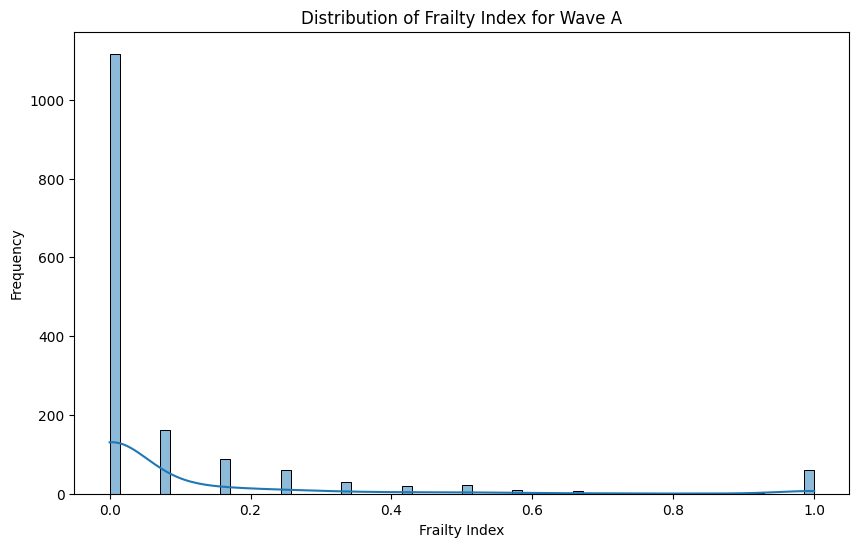

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of frailty index for a specific wave
plt.figure(figsize=(10, 6))
sns.histplot(initial_age_df['a_frailty'], kde=True)  # Adjust for other waves
plt.title("Distribution of Frailty Index for Wave A")
plt.xlabel("Frailty Index")
plt.ylabel("Frequency")
plt.show()
